<a href="https://colab.research.google.com/github/nsalazard/EFM-analisis-de-datos-/blob/main/EFM_S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vJTUFO1kEzMFwv7rnC6RtzccE8hJz-6IrXFt2rXl5kU/edit#gid=0')
worksheet=wb.worksheet('N1')
rows = worksheet.get_all_values()
d1=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
d1.columns = d1.iloc[2]
titles=titles.iloc[2:3]
d1 = d1.iloc[3:]
d1.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2,Espesor1,PL_R,S_PL_R,PL_C,ln(PL_C),S_PL_C,PL_B,ln(PL_B),S_PL_B,Espesor2,C_R,S_C_R,C_C,ln(C_C),S_C_C,C_B,ln(C_B),S_C_B,Espesor3,A_R,S_A_R,A_C,ln(A_C),S_A_C,A_B,ln(A_B),S_A_B
3,0.07,0.00,0.00,246.40,5.51,12.40,362.80,5.893851718,9.26,0.07,0.40,0.55,412.00,6.02,17.59,438.20,6.08,26.98,0.05,0.20,0.45,367.80,5.91,21.16,415.86,6.03,12.98
4,0.16,0.00,0.00,143.20,4.96,8.67,343.60,5.83947819,11.24,0.12,0.00,0.00,389.40,5.96,11.89,414.80,6.03,10.59,0.15,0.00,0.00,253.60,5.54,12.10,390.57,5.97,18.38
5,0.29,0.00,0.00,60.40,4.10,7.83,306.40,5.724891438,5.73,0.29,0.00,0.00,337.00,5.82,12.14,396.40,5.98,22.78,0.26,0.00,0.00,168.20,5.13,17.71,386.00,5.96,20.10
6,0.41,0.00,0.00,27.20,3.30,3.96,280.20,5.635503634,21.86,0.50,0.00,0.00,274.00,5.61,11.81,414.20,6.03,15.12,0.41,0.00,0.00,112.40,4.72,4.16,371.00,5.92,15.56
7,0.8,0.00,0.00,2.00,0.69,1.22,214.80,5.369707363,25.53,0.93,0.00,0.00,208.80,5.34,14.79,398.60,5.99,28.38,0.76,0.00,0.00,32.80,3.49,6.65,333.20,5.81,11.17


In [ ]:
nombres=d1.columns[0:27]
for name in nombres:
  d1[name]= pd.to_numeric(d1[name])

In [ ]:
d1.columns[0:27]

Index(['Espesor1', 'PL_R', 'S_PL_R', 'PL_C', 'ln(PL_C)', 'S_PL_C', 'PL_B',
       'ln(PL_B)', 'S_PL_B', 'Espesor2', 'C_R', 'S_C_R', 'C_C', 'ln(C_C)',
       'S_C_C', 'C_B', 'ln(C_B)', 'S_C_B', 'Espesor3', 'A_R', 'S_A_R', 'A_C',
       'ln(A_C)', 'S_A_C', 'A_B', 'ln(A_B)', 'S_A_B'],
      dtype='object', name=2)

In [ ]:
def f1(x,a,b):
  return a*x+b

def f2(x,a,b):
  return a*np.exp(-b*x)  

In [ ]:
def ERROR(x,y,m,b):
  N = np.size(x)
  Sx,Sy,Sxx,Syy,e,em,eb,z = 0,0,0,0,0,0,0,0
  for i in range (N-1):
    Sx += x[i]
    Sy += y[i] 
    Sxx += x[i]*x[i]
    Syy += y[i]*y[i]
    z += (b+ m*x[i] - y[i])**2
  e = np.sqrt(z/((N*Sxx -Sx*Sx)*(N-2)))
  em = np.sqrt(N)*e
  eb = np.sqrt(Sxx)*e

  return (em, eb)

In [ ]:
name = ["Radio", "Carbono", "Bario"]
Farben= ["darkviolet","crimson","dodgerblue","indigo","darkturquoise", "forestgreen", "darkturquoise","darkviolet", "dodgerblue"]

#PLOMO


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


Text(0.5, 1.0, 'Plomo Ln ($I_D$) vs $V_D$ [V]')

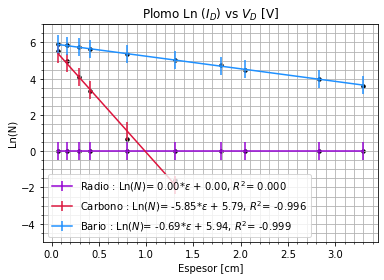

In [ ]:
row = [1,4,7] 
pl1 = [12,8,12]
material = ["Radio", "Carbono", "Bario"]
j = 0
ax = plt.subplots ()
for ii in row: 
  valx1=d1.loc[0:pl1[j],d1.columns[0]]
  valy1=d1.loc[0:pl1[j],d1.columns[ii]]
  valz =d1.loc[0:pl1[j],d1.columns[ii+1]]
  x1=valx1.values 
  y1=valy1.values
  z =valz.values
  plt.scatter(x1,y1,color="black",s=12)
  error = np.log(z/2)
  #plt.errorbar(x1, y1, yerr = 0.5,ecolor=Farben[j])
  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  #plt.plot(x1, f1(x1, gradient1, intercept1),color=Farben[j], label='%s : Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (material[j],gradient1, intercept1, r_value1))
  plt.errorbar(x1, f1(x1, gradient1, intercept1), yerr = 0.5,color=Farben[j],ecolor=Farben[j], label='%s : Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (material[j],gradient1, intercept1, r_value1))
  j += 1
plt.minorticks_on()
plt.ylim([-5, 7])
plt.grid(b=True,which="both")
plt.legend(loc="lower left") # lower left
plt.ylabel("Ln(N)")
plt.xlabel("Espesor [cm]")
plt.title("Plomo Ln ($I_D$) vs $V_D$ [V]")


In [ ]:
print(error)

[2.22570405 2.41947884 1.74571553 3.08465848 3.23985423 2.74598804
 2.32630162 1.91692261 1.74396881 1.09861229]


Text(0.5, 1.0, 'Plomo Ln ($I_D$) vs $V_D$ [V]')

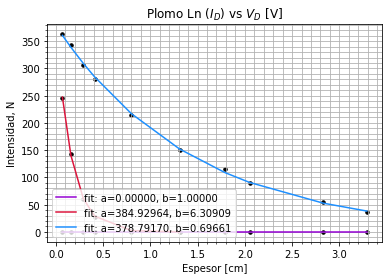

In [ ]:
row = [1,3,6] 
pl1 = [12,8,12]
j = 0
for ii in row: 
  valx1=d1.loc[0:pl1[j],d1.columns[0]]
  valy1=d1.loc[0:pl1[j],d1.columns[ii]]
  x1=valx1.values 
  y1=valy1.values
  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")

  #gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  #plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color=Farben[j],label='Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))
  popt, pcov = curve_fit(f2, x1, y1)
  plt.plot(x1, f2(x1, *popt), color=Farben[j], label='fit: a=%5.5f, b=%5.5f' % tuple(popt))
  j += 1

#plt.ylim([-4, 6.2])
plt.grid(b=True,which="both")
#plt.yscale("log")
plt.legend(loc="lower left") # lower left
plt.ylabel("Intensidad, N")
plt.xlabel("Espesor [cm]")
plt.title("Plomo Ln ($I_D$) vs $V_D$ [V]")

#Concreto


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Concreto Ln ($I_D$) vs $V_D$ [V]')

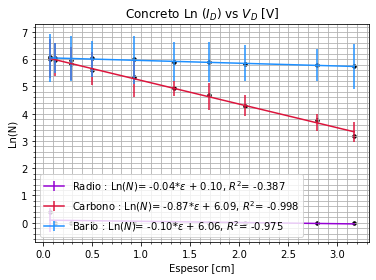

In [ ]:
row = [10,13,16] 
pl1 = [12,12,12]
j = 0
valx=d1.loc[0:pl1[0],d1.columns[0]]
x=valx.values 
for ii in row: 
  valx1=d1.loc[0:pl1[j],d1.columns[9]]
  valy1=d1.loc[0:pl1[j],d1.columns[ii]]
  x1=valx1.values 
  y1=valy1.values
  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")
  
  valz =d1.loc[0:pl1[j],d1.columns[ii+1]]
  z =valz.values
  error = np.log(z/2)/3
  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  #plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color=Farben[j],label='Ln($I_D$)= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))
  plt.errorbar(x1, f1(x1, gradient1, intercept1), yerr = error,color=Farben[j],ecolor=Farben[j], label='%s : Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (material[j],gradient1, intercept1, r_value1))
  j += 1

#plt.ylim([-4, 6.2])
plt.grid(b=True,which="both")
plt.legend(loc="lower left") # lower left
plt.ylabel("Ln(N)")
plt.xlabel("Espesor [cm]")
plt.title("Concreto Ln ($I_D$) vs $V_D$ [V]")

#ACERO


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Plomo Ln ($I_D$) vs $V_D$ [V]')

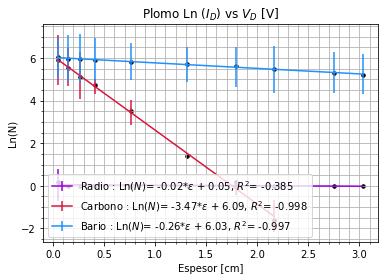

In [ ]:
row = [19,22,25] 
pl1 = [12,10,12]
j = 0
for ii in row: 
  valx1=d1.loc[0:pl1[j],d1.columns[18]]
  valy1=d1.loc[0:pl1[j],d1.columns[ii]]
  x1=valx1.values 
  y1=valy1.values
  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")

  valz =d1.loc[0:pl1[j],d1.columns[ii+1]]
  z =valz.values
  error = np.log(z/2)/2
  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  #plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color=Farben[j],label='Ln($I_D$)= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))
  plt.errorbar(x1, f1(x1, gradient1, intercept1), yerr = error,color=Farben[j],ecolor=Farben[j], label='%s : Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (material[j],gradient1, intercept1, r_value1))
  j += 1

#plt.ylim([-4, 6.2])
plt.grid(b=True,which="both")
plt.legend(loc="lower left") # lower left
plt.ylabel("Ln(N)")
plt.xlabel("Espesor [cm]")
plt.title("Plomo Ln ($I_D$) vs $V_D$ [V]")

#N2

In [ ]:
import gspread
import pandas as pd
import statsmodels.api as sm
import statistics
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm, linregress
import matplotlib.colors as mcolors
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1vJTUFO1kEzMFwv7rnC6RtzccE8hJz-6IrXFt2rXl5kU/edit#gid=0')
worksheet=wb.worksheet('N2')
rows = worksheet.get_all_values()
df=pd.DataFrame(rows)
titles=pd.DataFrame(rows)
df.columns = df.iloc[2]
titles=titles.iloc[2:3]
df = df.iloc[3:]
df.head()

2,Espesor1,PL_R,S_PL_R,PL_C,ln(PL_C),S_PL_C,PL_B,ln1,S_PL_B,Espesor2,C_R,ln(C_R),S_C_R,C_C,ln(C_C),S_C_C,C_B,ln2,S_C_B
3,0.05,1.2,0.4472135955,261.8,5.567580853,12.45793,380,5.940171253,8.21584,0.07,490,6.194405391,11.16542282,497.5,6.209595557,32.60368,485.5,6.185179288,19.36492
4,0.11,0,0,240,5.480638923,5.38516,361,5.888877958,19.73575,0.12,502,6.21860012,0.8164965809,497.2,6.20899236,12.76388,488.5,6.191339471,22.72297
5,0.2,0,0,217.6,5.382658515,13.10725,371.6,5.917818007,8.98888,0.29,491,6.196444128,4.082482905,488.75,6.191851111,21.50000,488.25,6.19082757,5.37742
6,0.59,0,0,125.8,4.834693344,8.04363,376.2,5.930120917,26.89238,0.50,508.25,6.230973453,10.24288371,490.75,6.195934833,25.83763,482.5,6.178980921,19.26136
7,0.8,0,0,85,4.442651256,7.48331,352.4,5.864766894,17.51571,0.93,494.25,6.203041462,20.13909962,480.5,6.174827228,20.50203,483,6.180016654,11.40175


In [ ]:
nombres=df.columns[0:18]
for name in nombres:
  df[name]= pd.to_numeric(df[name])

#ALUMINIO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Aluminio Ln ($I_D$) vs $V_D$ [V]')

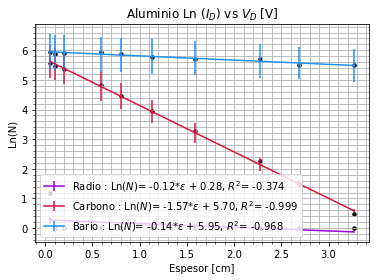

In [ ]:

row = [1,4,7] 
pl1 = [12,12,12]
j = 0
valx=df.loc[0:pl1[0],df.columns[0]]
x=valx.values 
for ii in row: 
  valx1=df.loc[0:pl1[j],df.columns[0]]
  valy1=df.loc[0:pl1[j],df.columns[ii]]
  x1=valx1.values 
  y1=valy1.values
  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")

  valz =d1.loc[0:pl1[j],d1.columns[ii+1]]
  z =valz.values
  error = np.log(z/2)
  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  #plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color=Farben[j],label='Ln($I_D$)= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))
  plt.errorbar(x1, f1(x1, gradient1, intercept1), yerr = y1*0.1,color=Farben[j],ecolor=Farben[j], label='%s : Ln($N$)= %2.2f*$ε$ + %2.2f, $R^2$= %3.3f' % (material[j],gradient1, intercept1, r_value1))
  j += 1

#plt.ylim([-4, 6.2])
plt.grid(b=True,which="both")
plt.legend(loc="lower left") # lower left
plt.ylabel("Ln(N)")
plt.xlabel("Espesor [cm]")
plt.title("Aluminio Ln ($I_D$) vs $V_D$ [V]")

#Aire

Text(0.5, 1.0, 'Aire ($I_D$) vs $ε$ [V]')

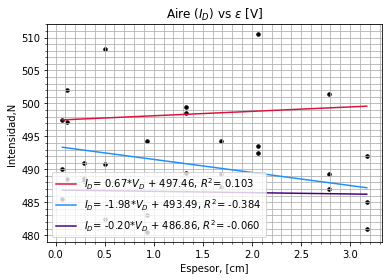

In [ ]:
#Aire sin ln
row = [10,13,16] 
pl1 = [12,12,12]
j = 0
valx=df.loc[0:pl1[0],df.columns[0]]
x=valx.values 
for ii in row: 
  valx1=df.loc[0:pl1[j],df.columns[9]]
  valy1=df.loc[0:pl1[j],df.columns[ii]]
  x1=valx1.values 
  y1=valy1.values
  j += 1
  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")

  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color=Farben[j],label='$I_D$= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.ylim([-4, 6.2])
plt.grid(b=True,which="both")
plt.legend(loc="lower left") # lower left
plt.ylabel("Intensidad,N")
plt.xlabel("Espesor, [cm]")
plt.title("Aire ($I_D$) vs $ε$ [V]")

Text(0.5, 1.0, 'Aire Ln($N$) vs $ε$')

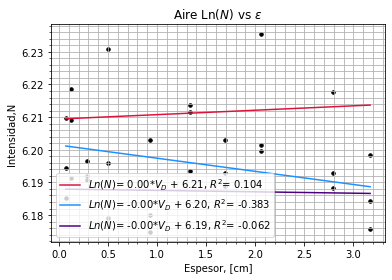

In [ ]:
#Aire CON ln
row = [11,14,17] 
pl1 = [12,12,12]
j = 0
valx=df.loc[0:pl1[0],df.columns[0]]
x=valx.values 
for ii in row: 
  valx1=df.loc[0:pl1[j],df.columns[9]]
  valy1=df.loc[0:pl1[j],df.columns[ii]]
  x1=valx1.values 
  y1=valy1.values
  j += 1
  plt.scatter(x1,y1,color="black",s=12)
  plt.minorticks_on()
  plt.grid(b=True,which="both")

  gradient1, intercept1, r_value1, p_value1, std_err1 = linregress(x1,y1)
  plt.plot(x1, f1(x1, gradient1, intercept1), 'b-',color=Farben[j],label='$Ln(N)$= %2.2f*$V_D$ + %2.2f, $R^2$= %3.3f' % (gradient1, intercept1, r_value1))

#plt.ylim([-4, 6.2])
plt.grid(b=True,which="both")
plt.legend(loc="lower left") # lower left
plt.ylabel("Intensidad,N")
plt.xlabel("Espesor, [cm]")
plt.title("Aire Ln($N$) vs $ε$")